In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
#Part 1 : Checking for any missing values 

data = pd.read_csv("C:\\Users\\shrey\\OneDrive\\Desktop\\simplilearn\\project\\employee turnover\\dataset\\employee_data.csv")
print(data.info(), "\n-----------------------\n")
#From data.info() we can se there are no missing values in the dataset for any of the features 
print(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB
None 
-----------------------

   satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1             

<h2>Part 2.1 : Correlation HeatMap s</h2>
Correlation for 2 variables is calculated using the below formula. 


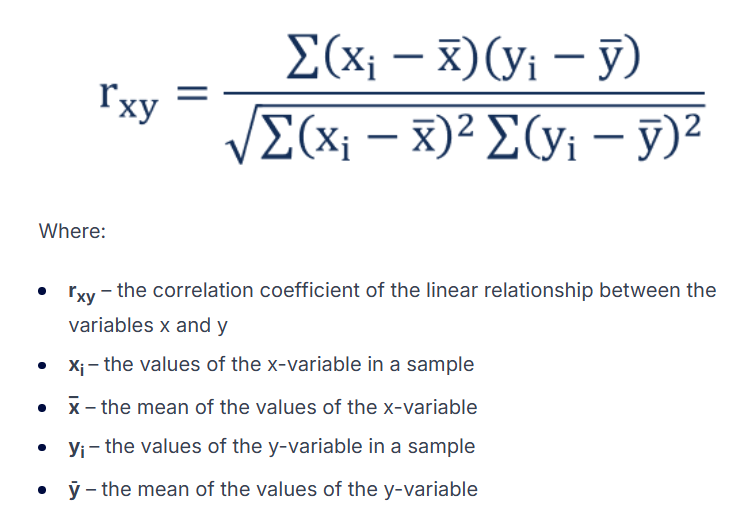

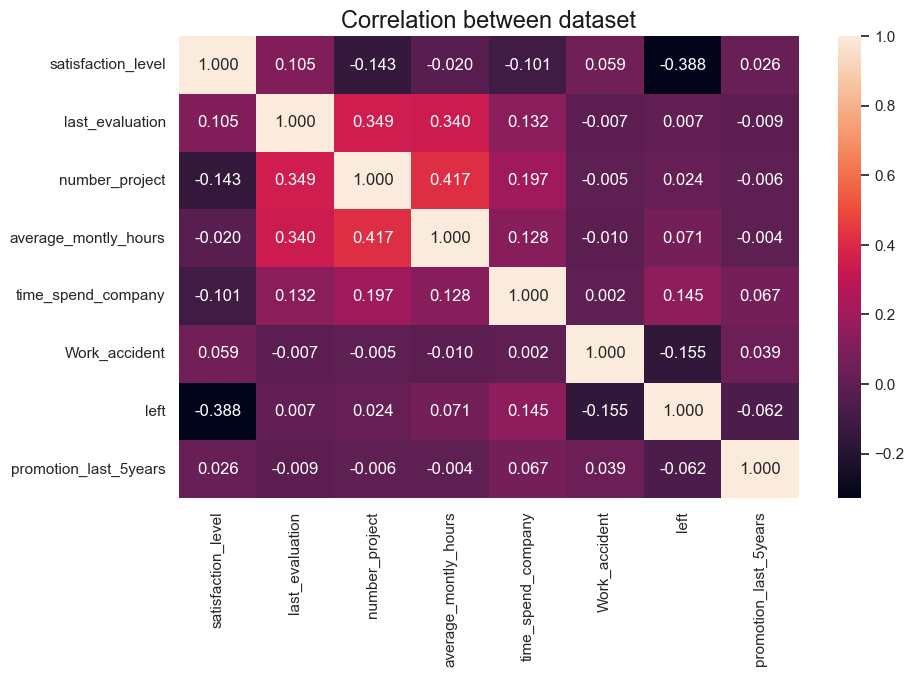

In [13]:
'''
all numerical features : satisfaction_level  last_evaluation  number_project  average_montly_hours time_spend_company(years)
Correlation heatmap :  - The heatmap visualizes the correlation between different features in the dataset,
helping identify highly correlated pairs.
'''

plt.figure(figsize=(10,6))
corr = data.corr(numeric_only=True)
sns.heatmap(corr,annot=True,fmt=".3f", robust=True)
plt.title("Correlation between dataset",fontsize=17,c="k")
plt.show()


<h2>2.2 : Distribution Plot</h2>
Distribution plots plot a univariate distribution of data.

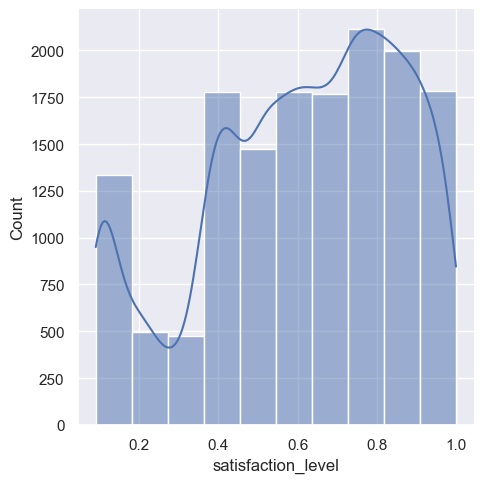

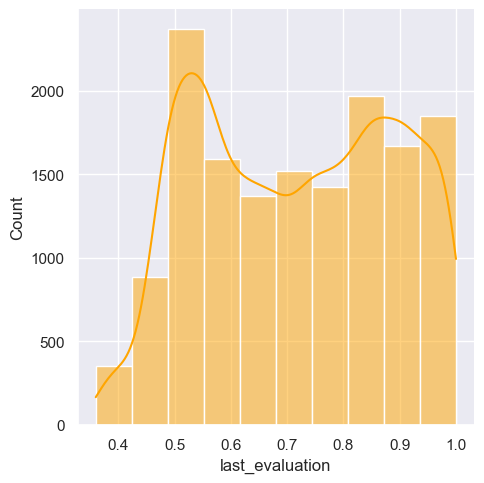

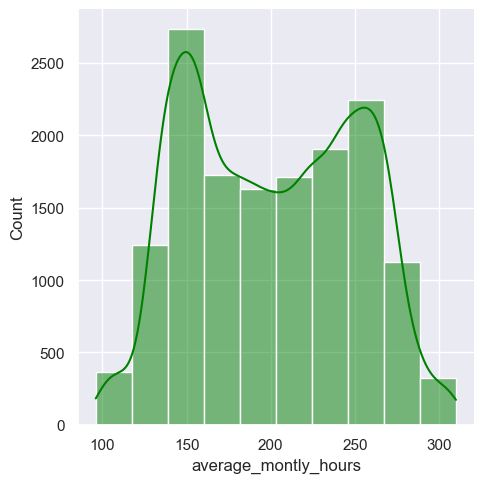

In [14]:
sns.displot(data["satisfaction_level"],  kde = True,bins = 10)

sns.displot(data["last_evaluation"], kde = True, bins = 10, color = "orange")

sns.displot(data["average_montly_hours"], kde = True, bins = 10, color = "green")


<h2>2.3 Bar Plot </h2>

Text(0, 0.5, 'Average no. of project for an employee')

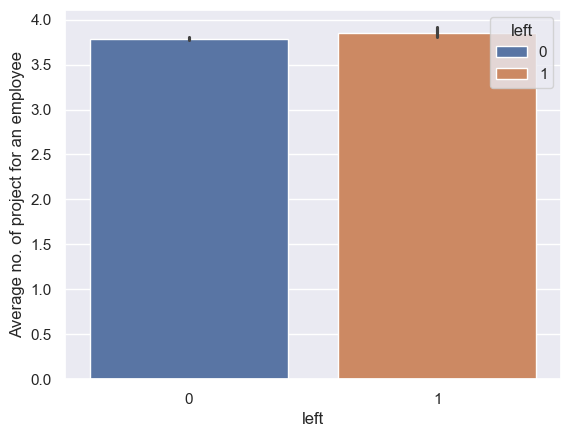

In [15]:
sns.set_theme(style="darkgrid")
sns.barplot(data, x="left", y="number_project", hue="left")
plt.ylabel("Average no. of project for an employee")

<h2> 3 : Clustering </h2>
<h4> 3.1 : Choosing satisfaction_level, last_evaluation and left</h4>

In [31]:
columns_for_clustering = ["satisfaction_level", "last_evaluation"]
employees_who_left = data[data['left']==1]
data_clustering = employees_who_left[columns_for_clustering].values
print(data_clustering)

[[0.38 0.53]
 [0.8  0.86]
 [0.11 0.88]
 ...
 [0.37 0.53]
 [0.11 0.96]
 [0.37 0.52]]


<h4>3.2: K-Means clustering of employees who left into 3 clusters</h4>
K-means clustering is an unsupervised machine learning algorithm that partitions data into k clusters by minimizing the within-cluster variance.

- It groups unlabeled data into clusters by identifying the k number of centroids.
- It assigns every data point to the closest cluster by calculating and using the pairwise Euclidean distance between points.


**k-means++** : instead of randomly selecting the k centroids, K-Means++ improves the initialization by:

<li>Selecting the first centroid randomly from the data points.
<li>Calculating the squared distance 𝐷(𝑥)^2 of all points from the nearest selected centroid.
<li>Sampling the next centroid with probability proportional to 𝐷(𝑥)^2.
<li>Repeating steps 2–3 until 𝑘 k centroids are selected.<br>

**Key Intuition for greedy k-means++**
<li>Higher D(x)^2: Points far from existing centroids are more likely to become new centroids.
<li>Spread-Out Centroids: This ensures centroids are initialized in regions with high data density, reducing convergence time.

In [32]:
from sklearn.cluster import KMeans 
clustering_model = KMeans(n_clusters = 3, n_init = 10, init= "k-means++", random_state=42)
y_kmeans = clustering_model.fit_predict(data_clustering)
y_kmeans


array([0, 1, 2, ..., 0, 2, 0])

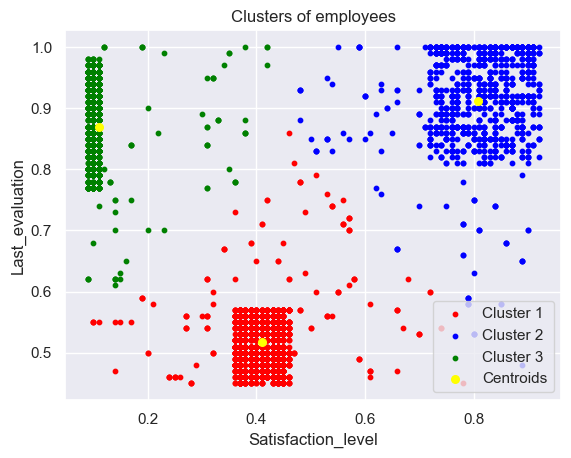

In [36]:
plt.scatter(data_clustering[y_kmeans == 0, 0], data_clustering[y_kmeans == 0, 1], s = 10, c = 'red', label = 'Cluster 1')
plt.scatter(data_clustering[y_kmeans == 1, 0], data_clustering[y_kmeans == 1, 1], s = 10, c = 'blue', label = 'Cluster 2')
plt.scatter(data_clustering[y_kmeans == 2, 0], data_clustering[y_kmeans == 2, 1], s = 10, c = 'green', label = 'Cluster 3')

plt.scatter(clustering_model.cluster_centers_[:, 0], clustering_model.cluster_centers_[:, 1], s = 30, c = 'yellow', label = 'Centroids')
plt.title('Clusters of employees')
plt.xlabel('Satisfaction_level')
plt.ylabel('Last_evaluation')
plt.legend()
plt.show()

<h4> 3.2b : Clustering of people who stayed into 3 groups </h4>

In [43]:
# employees_who_stayed = data[data['left']==0]
# data_clustering_b = employees_who_stayed[columns_for_clustering].values
# print(data_clustering_b)

[[0.58 0.74]
 [0.82 0.67]
 [0.45 0.69]
 ...
 [0.85 0.54]
 [0.33 0.65]
 [0.5  0.73]]


In [50]:

# clustering_model_b = KMeans(n_clusters = 3, n_init = 10, init= "k-means++", random_state=43)
# y_kmeans_b = clustering_model_b.fit_predict(data_clustering_b)
# y_kmeans_b

array([1, 0, 1, ..., 0, 1, 1])

In [52]:
# plt.scatter(data_clustering_b[y_kmeans_b == 0, 0], data_clustering_b[y_kmeans_b == 0, 1], s = 10, c = 'red', label = 'Cluster 1')
# plt.scatter(data_clustering_b[y_kmeans_b == 1, 0], data_clustering_b[y_kmeans_b == 1, 1], s = 10, c = 'blue', label = 'Cluster 2')
# plt.scatter(data_clustering_b[y_kmeans_b == 2, 0], data_clustering_b[y_kmeans_b == 2, 1], s = 10, c = 'green', label = 'Cluster 3')

# plt.scatter(clustering_model_b.cluster_centers_[:, 0], clustering_model_b.cluster_centers_[:, 1], s = 30, c = 'yellow', label = 'Centroids')
# plt.title('Clusters of employees who stayed')
# plt.xlabel('Satisfaction_level')
# plt.ylabel('Last_evaluation')
# plt.legend()
# plt.show()

<h3>Inferences from Cluster Scatter plot of employees who left : </h3>
Cluster 1 : Blue <br>
<li>High satisfaction levels (above 0.6) and high last evaluation scores (above 0.8).
<li>These employees were highly satisfied and performed well.
<li>Possible reasons for leaving:<br>
 --- Overwork or burnout despite good performance.<br>
 --- Lack of career progression or growth opportunities / better offer from elsewhere<br><br>

Cluster 2 : Red <br>
<li>Low to moderate satisfaction levels (around 0.3-0.5) with lower evaluation scores (around 0.5-0.7).
<li>These employees are moderately engaged but show lower performance.
<li>Possible reasons for leaving:<br>
 --- Lack of motivation or poor alignment with the company's goals.<br>
 --- Dissatisfaction with workplace policies or environment.


Cluster 3 : Green <br>
<li>Very low satisfaction levels (below 0.2) with extremely high evaluation scores (around 0.9-1.0)
<li>These employees are unhappy but performed exceptionally well.
<li>Possible reasons for leaving:<br>
 --- Feeling undervalued or underappreciated despite excellent performance<br>


<h2> SMOTE </h2>
<h4> 4.1 : Preprocess deat by converting categorical to numerical columns </h4>
